# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [27]:
# Initializing a dataframe which will store all the information
cities_weather_df = pd.DataFrame(cities)
cities_weather_df = cities_weather_df.rename({0:"City"},axis='columns')
cities_weather_df["Country"] = ""
cities_weather_df["Date"] = ""
cities_weather_df["Latitude"] = ""
cities_weather_df["Longitude"] = ""
cities_weather_df["Temperature"] = ""
cities_weather_df["Humidity"] = ""
cities_weather_df["Cloudiness"] = ""
cities_weather_df["Wind Speed"] = ""
cities_weather_df.head()

,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,longyearbyen,,,,,,,,
1,severo-kurilsk,,,,,,,,
2,attawapiskat,,,,,,,,
3,taolanaro,,,,,,,,
4,carnarvon,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
base_url="http://api.openweathermap.org/data/2.5/weather?"

In [29]:
api_key="af48d6b340ea65cb6e7657f319a65b30"

In [30]:
query_url =url + "appid=" + api_key + "&q="
#f"{url}appid={api_key}&q="


In [31]:
params = {
    "APPID": api_key,
    "units": "Imperial",
    "q": ""
}


# Loop through the cities Dataframe and run a weather search for each city
for index, row in cities_weather_df.iterrows():

    # update query value
    params["q"] = row["City"]

    # make request
    city_weather_url = requests.get(base_url, params)
    city_weather = city_weather_url.json()
    
    # print the number of record and city being processed 
    print(f"\nProcessing record {index + 1} for city {row[0]}")
    
    # assign values in the dataframe
    # using try-except so that cities for which no data is returned from API can be assigned NaN value and processed correctly
    try:
        cities_weather_df.loc[index,"Country"] = city_weather["sys"]["country"]
        cities_weather_df.loc[index,"Date"] = city_weather["dt"]
        cities_weather_df.loc[index,"Latitude"] = city_weather["coord"]["lat"]
        cities_weather_df.loc[index,"Longitude"] = city_weather["coord"]["lon"]
        cities_weather_df.loc[index,"Temperature"] = city_weather["main"]["temp_max"]
        cities_weather_df.loc[index,"Humidity"] = city_weather["main"]["humidity"]
        cities_weather_df.loc[index,"Cloudiness"] = city_weather["clouds"]["all"]
        cities_weather_df.loc[index,"Wind Speed"] = city_weather["wind"]["speed"]
    except:
        cities_weather_df.loc[index,"Country"] = np.nan
        cities_weather_df.loc[index,"Date"] = np.nan
        cities_weather_df.loc[index,"Latitude"] = np.nan
        cities_weather_df.loc[index,"Longitude"] = np.nan
        cities_weather_df.loc[index,"Temperature"] = np.nan
        cities_weather_df.loc[index,"Humidity"] = np.nan
        cities_weather_df.loc[index,"Cloudiness"] = np.nan
        cities_weather_df.loc[index,"Wind Speed"] = np.nan
        print("City not found... skipping.")


Processing record 1 for city longyearbyen

Processing record 2 for city severo-kurilsk

Processing record 3 for city attawapiskat
City not found... skipping.

Processing record 4 for city taolanaro
City not found... skipping.

Processing record 5 for city carnarvon

Processing record 6 for city richards bay

Processing record 7 for city chokurdakh

Processing record 8 for city kulhudhuffushi

Processing record 9 for city vaini

Processing record 10 for city ushuaia

Processing record 11 for city atuona

Processing record 12 for city provideniya

Processing record 13 for city rikitea

Processing record 14 for city banjar

Processing record 15 for city port lincoln

Processing record 16 for city hun

Processing record 17 for city katsuura

Processing record 18 for city qaanaaq

Processing record 19 for city itoman

Processing record 20 for city new norfolk

Processing record 21 for city tuktoyaktuk

Processing record 22 for city khatanga

Processing record 23 for city wajid

Processing 


Processing record 184 for city humaita

Processing record 185 for city shakiso

Processing record 186 for city aktash
City not found... skipping.

Processing record 187 for city kalmar

Processing record 188 for city shelburne

Processing record 189 for city luderitz

Processing record 190 for city jamestown

Processing record 191 for city yuzhno-yeniseyskiy
City not found... skipping.

Processing record 192 for city maragogi

Processing record 193 for city nizhneyansk
City not found... skipping.

Processing record 194 for city lompoc

Processing record 195 for city angoche

Processing record 196 for city vila franca do campo

Processing record 197 for city skhisma

Processing record 198 for city hamilton

Processing record 199 for city illoqqortoormiut
City not found... skipping.

Processing record 200 for city faanui

Processing record 201 for city te anau

Processing record 202 for city sandakan

Processing record 203 for city kodiak

Processing record 204 for city cidreira

Proces


Processing record 365 for city hameenlinna

Processing record 366 for city alice springs

Processing record 367 for city baykit

Processing record 368 for city dingle

Processing record 369 for city tommot

Processing record 370 for city saint-leu

Processing record 371 for city petropavlovsk-kamchatskiy

Processing record 372 for city padang

Processing record 373 for city valparaiso

Processing record 374 for city dabat

Processing record 375 for city moree

Processing record 376 for city lakatoro

Processing record 377 for city winnipeg

Processing record 378 for city santa cruz de tenerife

Processing record 379 for city zabaykalsk

Processing record 380 for city cocorit

Processing record 381 for city port blair

Processing record 382 for city zhoucheng

Processing record 383 for city sogne

Processing record 384 for city vestmannaeyjar

Processing record 385 for city moskovskiy

Processing record 386 for city ukhta

Processing record 387 for city pafos
City not found... skipping


Processing record 552 for city xining

Processing record 553 for city blytheville

Processing record 554 for city safford

Processing record 555 for city alexandria

Processing record 556 for city isangel

Processing record 557 for city xianyang

Processing record 558 for city wanning

Processing record 559 for city los llanos de aridane

Processing record 560 for city kamenskoye
City not found... skipping.

Processing record 561 for city sorland

Processing record 562 for city robertsport

Processing record 563 for city olafsvik
City not found... skipping.

Processing record 564 for city manta

Processing record 565 for city douglas

Processing record 566 for city oranjemund

Processing record 567 for city straumen

Processing record 568 for city baruun-urt

Processing record 569 for city kozachi laheri

Processing record 570 for city opuwo

Processing record 571 for city tilichiki

Processing record 572 for city hargeysa

Processing record 573 for city nkhata bay

Processing record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
# Cleanup data to remove cities for which response was not returned from Weather API
cities_weather_df = cities_weather_df.dropna()
cities_weather_df = cities_weather_df.reset_index()

In [33]:
# Visualize to confirm DataFrame is created correctly
cities_weather_df.head()

,index,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,0,longyearbyen,NO,1563608967,78.22,15.63,44.6,81,75,3.36
1,1,severo-kurilsk,RU,1563608984,50.68,156.12,47.32,94,48,3.62
2,4,carnarvon,ZA,1563608956,-30.97,22.13,42.1,42,5,11.3
3,5,richards bay,ZA,1563608977,-28.77,32.06,65.5,57,100,40.87
4,6,chokurdakh,RU,1563608979,70.62,147.9,48.94,51,100,12.66


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

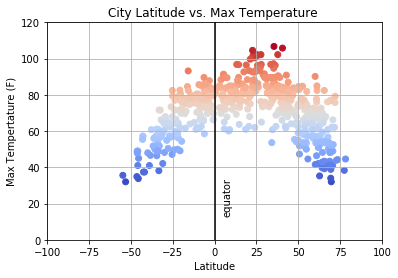

In [36]:
# Build the scatter plots for Latitude vs Temperature
plt.scatter(x=cities_weather_df["Latitude"],y=cities_weather_df["Temperature"],
            c=cities_weather_df["Temperature"], cmap=plt.cm.coolwarm)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature ")
plt.xlabel("Latitude")
plt.ylabel("Max Tempertature (F)")
plt.xlim(-100,100)
plt.ylim(0,120)
plt.vlines(0,-100,150)
plt.text(5,30,'equator', rotation=90)
plt.grid()

# Save Figure
plt.savefig("LatitudevsTemperaturePLOT.png")

#### Latitude vs. Humidity Plot

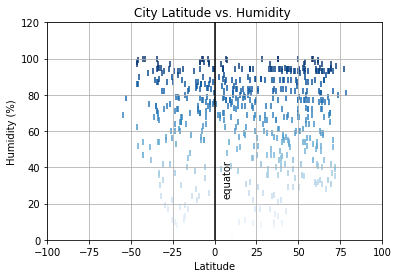

In [37]:
# Build the scatter plots for Latitude vs Humidity
plt.scatter(x=cities_weather_df["Latitude"],y=cities_weather_df["Humidity"],marker = "|",
            c=cities_weather_df["Humidity"], cmap=plt.cm.Blues)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity ")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,120)
plt.xlim(-100,100)
plt.vlines(0,-10,150)
plt.text(5,40,'equator', rotation=90)
plt.grid()

# Save Figure
plt.savefig("LatitudevsHumidityPLOT.png")

#### Latitude vs. Cloudiness Plot

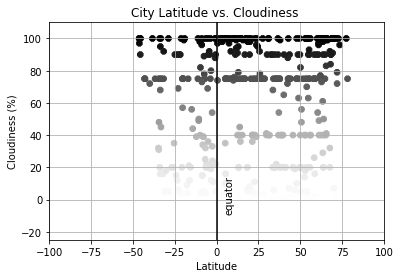

In [38]:
# Build the scatter plot for Latitude vs Cloudiness
plt.scatter(x=cities_weather_df["Latitude"],y=cities_weather_df["Cloudiness"],marker="8",
            c=cities_weather_df["Cloudiness"], cmap=plt.cm.Greys)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-100,100)
plt.ylim(-25,110)
plt.vlines(0,-25,120)
plt.text(5,10,'equator', rotation=90)
plt.grid()

# Save Figure
plt.savefig("LatitudevsCloudinessPLOT.png")

#### Latitude vs. Wind Speed Plot

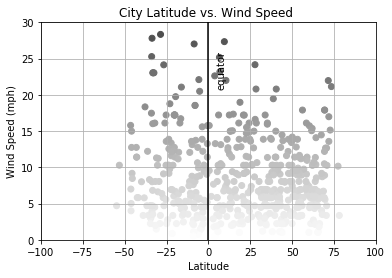

In [40]:
# Build the scatter plot for Latitude vs Wind Speed
plt.scatter(x=cities_weather_df["Latitude"],y=cities_weather_df["Wind Speed"],
            c=cities_weather_df["Wind Speed"], cmap=plt.cm.binary)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-100,100)
plt.ylim(0,30)
plt.vlines(0,0,30)
plt.text(5,25,'equator', rotation=90)
plt.grid()

# Save Figure
plt.savefig("LatitudevsWindSpeedPLOT.png")